Catedra 01
===========

### Primera tarea sera anunciada hoy.
- Entrega el segundo miercoles, despues de haber tenido 2 auxiliares.

## La primera parte del curso
- Derivadas e Integrales numericas.
- Manejo de errores debido a precision.

In [2]:
import matplotlib.pyplot as plt
import matplotlib as mp
import math
%matplotlib inline

### Nota:
- matplotlib.org -> documentacion de pyplot.

In [3]:
# Cambia el tamano de los ticks (los puntos de los ejes)
mp.rcParams['xtick.labelsize'] = 13
mp.rcParams['ytick.labelsize'] = 13

# Manejo de errores:

## Error de truncacion
- Calculo del numero e a traves de la expansion de Taylor: $\sum_{k=0}^{\infty}\frac{x^{k}}{k!}$

### Forma basica:

In [4]:
# Parametros iniciales.
e = 1.
k_factorial = 1.
N_max = 10
e_vs_n = [e] # Lista que va a contener los elementos de la serie.
for i in range(1,N_max): # Ciclo que calcula los elementos de la serie y los suma.
    k_factorial *= i
    e += 1. / k_factorial
    e_vs_n.append(e)

In [5]:
# Instruccion para imprimir nuestra aproximacion a e en cada iteracion.
for i in range(N_max):
    print(i, e_vs_n[i])

(0, 1.0)
(1, 2.0)
(2, 2.5)
(3, 2.6666666666666665)
(4, 2.708333333333333)
(5, 2.7166666666666663)
(6, 2.7180555555555554)
(7, 2.7182539682539684)
(8, 2.71827876984127)
(9, 2.7182815255731922)


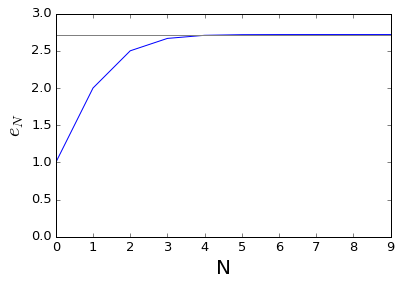

In [6]:
plt.plot(range(N_max), e_vs_n) # Genera un grafico de e_vs_n v
plt.axhline(math.e, color='0.5') # Genera una linea en 'e'
plt.ylim(0,3) # Cambia los limites del eje y del grafico
# Cambia los labels del grafico.
plt.xlabel('N', fontsize=20)
plt.ylabel('$e_{N}$', fontsize=20)

"\nNOTA:\nLo anterior es equivalente a hacer\nplt.semilogy(range(N_max), diferencia))\nplt.xlabel('N', fontsize=20)\nplt.ylabel('$e_N - e_{real}$', fontsize=20)\n"

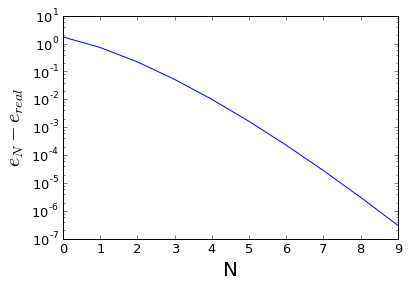

In [7]:
# Se hace un ciclo for dentro de una lista. i.e. Comprehension list
diferencia = [math.fabs(e_i - math.e) for e_i in e_vs_n] # Nota. fabs convierte a float y luego calcular abs
# Se hace un grafico con escala logaritmica en el eje y.
plt.plot(range(N_max), diferencia)
plt.yscale('log')
plt.xlabel('N', fontsize=20)
plt.ylabel('$e_N - e_{real}$', fontsize=20)

"""
NOTA:
Lo anterior es equivalente a hacer
plt.semilogy(range(N_max), diferencia))
plt.xlabel('N', fontsize=20)
plt.ylabel('$e_N - e_{real}$', fontsize=20)
"""

## Efectos de precision sobre integrales
### Error de Redondeo
Calculando la derivada de $\sin(x)$

## Ahora usamos numpy

In [8]:
import numpy as np

In [9]:
epsilon = np.logspace(-1, -15, 14, base=10.)
print(epsilon)

[  1.00000000e-01   8.37677640e-03   7.01703829e-04   5.87801607e-05
   4.92388263e-06   4.12462638e-07   3.45510729e-08   2.89426612e-09
   2.42446202e-10   2.03091762e-11   1.70125428e-12   1.42510267e-13
   1.19377664e-14   1.00000000e-15]


In [10]:
print(type(e_vs_n))
print(type(epsilon))

<type 'list'>
<type 'numpy.ndarray'>


In [11]:
dsindx = (np.sin(1.+epsilon) - np.sin(1.)) / epsilon
print(dsindx)

[ 0.49736375  0.5367716   0.54000703  0.54027757  0.54030023  0.54030213
  0.54030229  0.54030231  0.54030266  0.54029766  0.54034525  0.54065914
  0.53940522  0.55511151]


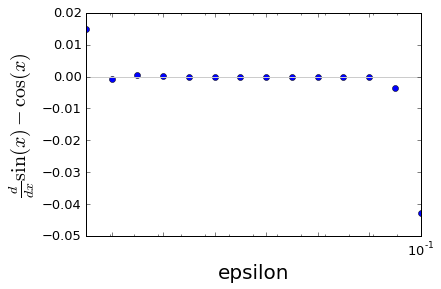

In [12]:
plt.semilogx(epsilon, dsindx - np.cos(1.), 'o')
plt.axhline(0, color='0.8')
plt.xlabel('epsilon', fontsize=20)
plt.ylabel('$\\frac{d}{dx}\\sin(x) - \\cos(x)$', fontsize=20)
_ = plt.xticks(epsilon[::2])

# Catedra 02 (Continuacion de Catedra 01)

## Integrales Numericas

$$g(x) = \int_{a}^{x} f(x')dx'$$

Equivale a resolver una ecuacion diferencial:

$$g'(x)  = f(x)$$ con condiciones de borde: 
$$\int_{a}^{x}g'(x')dx' = \int_{a}^{x}f(x')dx'$$

$$g(x)-g(a) = \int_{a}^{x}f(x')dx'$$

# Integracion Numerica Directa

# Regla Trapezoidal

### Idea: Aproximar el area de la curva como el area bajo un trapecio entre dos puntos de la funcion

![title](../img/trapezoidal_demo.png "Idea del metodo.")

$$
\int_{x_{0}}^{x_{0}+\Delta x}f(x')dx'
$$

Haciendo una expansion de taylor sobre la integral se obtiene:

$$
\int_{x_{0}}^{x_{0}+\Delta x}\left[
    f(x_{0}) + f'(x_{o})(x'-x_{0}) + \frac{1}{2}f''(x_{0})(x'-x_{0})^{2} + \ldots
\right]dx'
$$

$$
= f(x_{0}\Delta x + \frac{f'(x_{0})(x-x_{0})^{2}}{2}\biggr\vert_{x_{0}}^{x} + \frac{1}{2}f''(x_{0})\frac{(x-x_{0})^{3}}{3}\biggr\vert_{x_{0}}^{x} + \ldots
$$

$$
= f(x_{0})\Delta x + f'(x_{0})\frac{\Delta x^{2}}{2} + \frac{1}{6}f''(x_{0})\Delta x^{3} + \ldots
$$

$$
= \frac{\Delta x}{2}\left[
    f(x_{0}) + \left(
        f(x_{0}) + f'(x_{0})\Delta x + f''(x_{0})\frac{\Delta x^{2}}{2} + \ldots
    \right) - f''(x_{0})\frac{\Delta x^{2}}{6}
\right]
$$

Note que el error de truncacion es del mismo orden en $\Delta x$ que el ultimo termino previo a truncar.

$$
\int_{x_0}^{x_{0}+\Delta x}f(x')dx' = \frac{\Delta x}{2}\left[
    f(x_{0}) + f(x_{0}+\Delta x) + O(\Delta x^2)
\right] = \left(
    f(x_{0}) + f(x_{0}+\Delta x)
\right)\frac{\Delta x}{2} + O(\Delta x^3)
$$

Donde $O(\Delta x^3) \sim -f''(x_{0})\frac{\Delta x^3}{12}$

(graficos van aca)

dividir [a,b] en $N = \frac{b-a}{\Delta x}$ tramos.

$$
\int_{a}^{b}f(x)dx \sim \sum_{i=0}^{N-1}\left[
    \frac{f(a+\Delta xi)+f(a+\Delta x(i+1))}{2}\Delta x + O^{*}(\Delta x^3)
\right]
$$

Nos interesa encontrar una cota superior para nuestro error. Como estamos sumando N tramos, estamos incluyendo N errores, y dado que el error de cada tramo va como $\Delta x^3$ y N va como $\Delta x$, el error finalmente queda como $O(\Delta x^2)$

$$
\sim \left[
    \sum_{i=0}^{N-1}\frac{f(a+\Delta xi)+f(a+\Delta x(i+1))}{2}\Delta x
\right] + NO^{*}(\Delta x^3) \rightarrow O(\Delta x^2)
$$

$$
\int_{a}^{b} f(x)dx \sim \frac{f(a)\Delta x}{2} + \sum_{i=1}^{N-1}f(a+i\Delta x)\Delta x + \frac{f(b)\Delta x}{2} + O(\Delta x^2)
$$

La regla compuesta asumiendo $\Delta x$ __constante__

## Regla de Simpson

### Idea: Mas evaluaciones (terminos de la expansion) a cambio de mayor precision.

Se hace una suerte de "doble Taylor"

$$
\int_{x_{0}}^{x_{0}+2\Delta x}f(x)dx = \int_{x_{0}}^{x_{0}+2\Delta x}\left[
    f(x_{0} + f'(x_{0})(x-x_{0}) + f''(x_{0})\frac{(x-x_{0})^{2}}{2} + f'''(x_{0})\frac{(x-x_{0})^{3}}{6} + f^{\text{iv}}(x_{0})\frac{(x-x_{0})^{4}}{24} + \ldots
\right]
$$

$$
= f(x_{0})2\Delta x + f'(x_{0})\frac{(2\Delta x)^{2}}{2} + \frac{f''(x_{0})}{2}\frac{(2\Delta x)^{3}}{3} + \frac{f'''(x_{0})}{6}\frac{(2\Delta x)^{4}}{4} + \frac{f^{\text{iv}}(x_{0})}{24}\frac{(2\Delta x)^{5}}{5}
$$

$$
= \frac{\Delta x}{3}\left[
    f(x_{0}) + 4f(x_{0}) + 4f'(x_{0})\Delta x + 4 f''(x_{0})\frac{\Delta x^2}{2} + 4f'''(x_{0})\frac{\Delta x^3}{6} \\
    + f(x_{0}) + f'(x_{0})(2\Delta x) + f''(x_{0})\frac{(2\Delta x)^{2}}{2} + f'''(x_{0})\frac{(2\Delta x)^{3}}{6} + O(\Delta x^4)
\right]
$$

$$
= \frac{\Delta x}{3}\left[
    f(x_{0}) + 4f(x_{0}+\Delta x) + f(x_{0} + 2\Delta x)
\right] + O(\Delta x^5)
$$

Note que para la regla compuesta el orden del error va como $\Delta x^4$

## Regla compuesta

$$
\int_{a}^{b}f(x)dx = \left[
    \sum_{i=1}^{N-1}\frac{\Delta x}{3}\left[
        f_{i-1} + 4f-{i} + f_{i+1}
    \right]
\right] + O(\Delta x^4)
$$

Donde $f_{i} = f(a+i\Delta x)$

Note que este metodo tambien asume $\Delta x$ constante.

(grafico aca)

## Limitaciones:
- Malos para funciones de alto contraste (grafico)
- No aplican si hay divergencias (integrables) en el intervalo [a,b] (si se crea una grilla que contiene una divergencia, entonces el algoritmo falla, dado que no sabe como manejarlas) (grafico)
- El intervalo debe ser finito. i.e. en general no se puede calcular $\int_{a}^{\infty}f(x)dx$. Aunque en ocasiones con un cambio de variables se cambian los limites de integracion tal que resulte un intervalo finito.

## Metodo trapezoidal para $\Delta x$ no constante

Cuando $\Delta x$ no es constante, la expresion anterior pierde validez. En este caso se debe implementar un $\Delta x$ variable y la expresion queda de la siguiente manera:

$$
\int_{a}^{b}f(x)dx \sim \frac{1}{2}\sum_{i=0}^{N-1}(x_{i+1}-x_{i})(f(x_{i+1})+f(x_{i}))
$$